# Example 1

Create a neural network to predict a function with the following properties:
1. Equation -> y = 2 * x - 1
2. Optimizer -> Stochastic Gradient Decent
3. Loss -> Mean Squared Error

### Imports

In [1]:
import logging

import cufflinks as cf
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
import tensorflow as tf

### Format Notebook

In [2]:
logging.basicConfig(level=logging.INFO)

init_notebook_mode(connected=True)
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True, theme='polar')

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

## Data

In [3]:
x = np.arange(10).astype(float)
y = 2 * x - 1

## Neural Network

### Create Model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])
model.compile(optimizer='sgd', loss='mean_squared_error')

### Train Model

In [5]:
history = model.fit(x, y, epochs=1000, verbose=0)

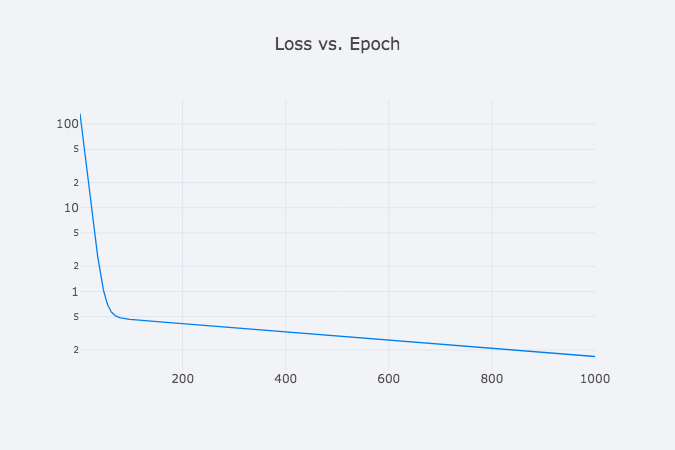

In [6]:
loss = pd.DataFrame(history.history['loss'], columns=['loss'])
loss.index += 1
loss.name = 'epoch'
loss.iplot(title='Loss vs. Epoch', logy=True)

## Plot Raw Data and Model Prediction

### Predict y for x = 10

In [7]:
f'x = 10; y_hat = {model.predict([10])[0][0]:.3f}'

'x = 10; y_hat = 18.548'

In [8]:
predict = model.predict_on_batch(x).flatten()

### Figure Parameters

In [9]:
font_family = 'Courier New, monospace'

axis_font = {
    'family': font_family,
    'size': 18,
    'color': 'gray',
}

legend_font = {
    'family': font_family,
    'size': 12,
    'color': 'black',
}

title_font = {
    'family': font_family,
    'size': 24,
    'color': 'black',
}

### Plot

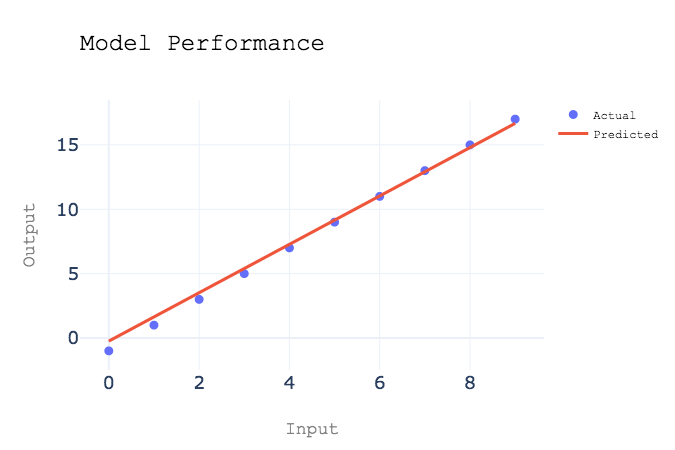

In [10]:
actual = go.Scatter(
    x = x,
    y = y,
    mode = 'markers',
    name = 'Actual',
)
predicted = go.Scatter(
    x = x,
    y = predict,
    mode = 'lines',
    name = 'Predicted',
)
data = [actual, predicted]
layout = go.Layout(
    title=go.layout.Title(
        text='Model Performance',
        font=title_font,
        xref='paper',
        x=0,
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Input',
            font=axis_font,
        ),
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Output',
            font=axis_font,
        ),
    ),
    legend=go.layout.Legend(
        font=legend_font,
    ),
)        
fig = go.FigureWidget(go.Figure(data=data, layout=layout))
fig.layout.template = 'plotly_white+presentation'
iplot(fig)